In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Flatten
from sklearn.preprocessing import MinMaxScaler

In [169]:
data = pd.read_csv("D:/Machine_Learning/ML/datasets/Apple_Stock_Price.csv")

In [170]:
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [171]:
data = data.reset_index()['close']

In [172]:
data.shape

(1258,)

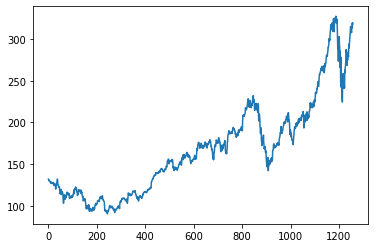

In [173]:
plt.plot(data)

In [174]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [175]:
data.shape

(1258, 1)

In [176]:
data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [177]:
training_size = int(len(data)*0.65)
val_size = int(len(data)-training_size) 
xtrain, xtest = data[0:training_size,:],data[training_size:len(data),:1]

In [178]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [179]:
time_step = 100
x_train, y_train = create_dataset(xtrain,time_step)
x_test, y_test = create_dataset(xtest,time_step)

In [180]:
x_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [181]:
print(x_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [182]:
print(x_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [183]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [186]:
model = Sequential()
model.add(LSTM(50,input_shape=(100,1),return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [187]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [188]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=60,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 187ms/step - loss: 0.0202 - val_loss: 0.0565
Epoch 2/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0035 - val_loss: 0.0046
Epoch 3/100
12/12 [==============================] - 1s 103ms/step - loss: 9.6417e-04 - val_loss: 0.0047
Epoch 4/100
12/12 [==============================] - 1s 104ms/step - loss: 9.0138e-04 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 1s 99ms/step - loss: 6.7975e-04 - val_loss: 0.0049
Epoch 6/100
12/12 [==============================] - 1s 101ms/step - loss: 5.8446e-04 - val_loss: 0.0052
Epoch 7/100
12/12 [==============================] - 1s 103ms/step - loss: 5.6714e-04 - val_loss: 0.0053
Epoch 8/100
12/12 [==============================] - 1s 108ms/step - loss: 6.1742e-04 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 1s 107ms/step - loss: 5.9225e-04 - val_loss: 0.0044
Epoch 10/100
12/12 [==============================] - 1s 101ms/s

12/12 [==============================] - 2s 129ms/step - loss: 2.0542e-04 - val_loss: 0.0012
Epoch 79/100
12/12 [==============================] - 2s 134ms/step - loss: 2.2136e-04 - val_loss: 9.8615e-04
Epoch 80/100
12/12 [==============================] - 2s 135ms/step - loss: 1.9280e-04 - val_loss: 9.3714e-04
Epoch 81/100
12/12 [==============================] - 2s 129ms/step - loss: 1.8760e-04 - val_loss: 8.8269e-04
Epoch 82/100
12/12 [==============================] - 2s 141ms/step - loss: 1.5310e-04 - val_loss: 8.6231e-04
Epoch 83/100
12/12 [==============================] - 2s 139ms/step - loss: 1.6445e-04 - val_loss: 9.7861e-04
Epoch 84/100
12/12 [==============================] - 2s 129ms/step - loss: 1.5059e-04 - val_loss: 9.5193e-04
Epoch 85/100
12/12 [==============================] - 1s 121ms/step - loss: 1.4005e-04 - val_loss: 9.0326e-04
Epoch 86/100
12/12 [==============================] - 1s 121ms/step - loss: 1.4688e-04 - val_loss: 9.6306e-04
Epoch 87/100
12/12 [=======

In [209]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [210]:
train_predict.shape

(716, 1)

In [213]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [214]:
train_predict.shape

(716, 1)

In [215]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.14933909490475

In [216]:
math.sqrt(mean_squared_error(y_test,test_predict))

238.04727258909756

## Visualising result

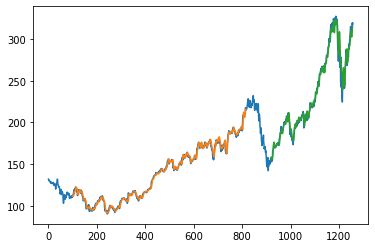

In [195]:
look_back = 100
trainPredictplot=np.empty_like(data)
trainPredictplot[:,:]=np.nan
trainPredictplot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictplot = np.empty_like(data)
testPredictplot[:,:]=np.nan
testPredictplot[len(train_predict)+(look_back*2)+1:len(data)-1,:]=test_predict

plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictplot)
plt.plot(testPredictplot)
plt.show()

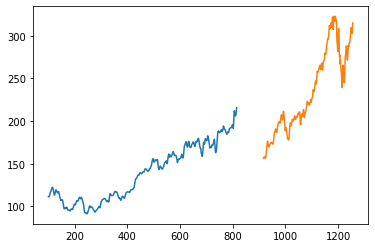

In [204]:
plt.plot(trainPredictplot)
plt.plot(testPredictplot)

In [196]:
x_input=xtest[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [197]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [198]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [199]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95023865]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

12 day output [[0.9116516]]
13 day input [0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.9

24 day output [[0.91986644]]
25 day input [0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.95023865 0.93976361 0.92632747
 0.91375005 0.90417808 0.89861226 0.89706111 0.89873701 0.90235597
 0.90648639 0.90987599 0

In [200]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

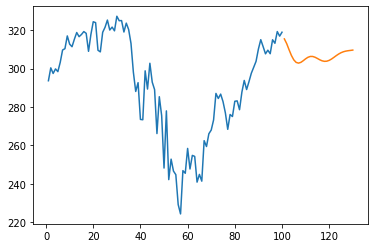

In [201]:
plt.plot(day_new,scaler.inverse_transform(data[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

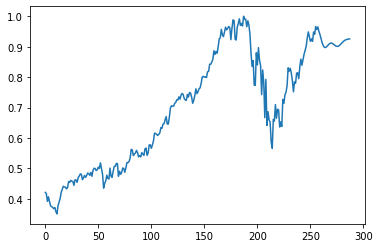

In [203]:
data_temp = data.tolist()
data_temp.extend(lst_output)
plt.plot(data_temp[1000:])